In [36]:
# Импортируем библиотеки для работы.
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from natsort import natsorted
import python2pseudocode as p2p

In [37]:
# LowerBound отвечает за поиск элемента, который больше либо равен значению key в массиве A.
def LowerBound(arr, key):
    left = -1
    right = len(arr)

    while right > left + 1:
        middle = (left + right) // 2
        if arr[middle][1] >= key:
            right = middle
        else:
            left = middle

    return right

In [38]:
# Поиск следующего шара в цепочке столкновений.
# Уточняем границы через grnz -> (grnz + l_box) % l_box.
# Два варианта поиска ближайшего - в лоб (+) и умный через идею о половине круга.
def FNB(x, y, arr, l_box, r):
    eps = 1e-8
    minn = 1e+12
    pos = -1
    x_res, y_res = 0, 0

    # Будет три случая - зона поиска в рамках коробки, зона поиска выходит снизу, зона поиска выходит сверху.
    # Можно выделить особый случай - когда рамки поиска будут выходить за границы, но засчет разделения ситуаций if-ами, а не elif-ами, эта проблема невелируется.
    # Пока предположим, что такой ситуации быть не может.

    # 1 случай. Зона поиска внутри коробки.
    if y - 2 * r + eps >= 0 and y + 2 * r - eps <= l_box:

        for i in range(LowerBound(arr, y - 2 * r + eps), len(arr)):

            if arr[i][1] > y + 2 * r + eps:
                break

            elif x + eps <= arr[i][0] and CCB(x, y, arr[i][0], arr[i][1], r)[1] <= minn - eps:
                minn = CCB(x, y, arr[i][0], arr[i][1], r)[1]
                x_res, y_res = arr[i][0], arr[i][1]
                pos = i
            elif arr[i][0] <= x + eps and CCB(x, y, arr[i][0] + l_box, arr[i][1], r)[1] <= minn - eps:
                minn = CCB(x, y, arr[i][0] + l_box, arr[i][1], r)[1]
                x_res, y_res = arr[i][0] + l_box, arr[i][1]
                pos = i

    # 2 случай, зона поиска выходит снизу.
    elif y - 2 * r + eps < 0:

        # Поиск в стандартном пространстве.
        for i in range(LowerBound(arr, y - 2 * r + eps), len(arr)):

            if arr[i][1] > y + 2 * r + eps:
                break

            elif x + eps < arr[i][0] and CCB(x, y, arr[i][0], arr[i][1], r)[1] < minn - eps:
                minn = CCB(x, y, arr[i][0], arr[i][1], r)[1]
                x_res, y_res = arr[i][0], arr[i][1]
                pos = i

            elif arr[i][0] < x + eps and CCB(x, y, arr[i][0] + l_box, arr[i][1], r)[1] <= minn - eps:
                minn = CCB(x, y, arr[i][0] + l_box, arr[i][1], r)[1]
                x_res, y_res = arr[i][0] + l_box, arr[i][1]
                pos = i

        # Поиск в сдвинутом пространстве.
        x_tmp, y_tmp = x, y + l_box

        for i in range(LowerBound(arr, y - 2 * r + l_box + eps), len(arr)):

            # Тут мы просто пробегаем доверху, то есть до конца массива.
            if x_tmp + eps < arr[i][0] and CCB(x_tmp, y_tmp, arr[i][0], arr[i][1], r)[1] < minn - eps:
                minn = CCB(x_tmp, y_tmp, arr[i][0], arr[i][1], r)[1]
                # Важный момент с тем, что возвращаемся к обычным координатам! Не сдвинутым!
                x_res, y_res = arr[i][0], arr[i][1] - l_box
                pos = i

            elif arr[i][0] <= x_tmp + eps and CCB(x_tmp, y_tmp, arr[i][0] + l_box, arr[i][1], r)[1] <= minn - eps:
                minn = CCB(x_tmp, y_tmp, arr[i][0] + l_box, arr[i][1], r)[1]
                # Важный момент с тем, что возвращаемся к обычным координатам! Не сдвинутым!
                x_res, y_res = arr[i][0] + l_box, arr[i][1] - l_box
                pos = i

    # 3 случай, зона выходит сверху.
    elif y + 2 * r - eps > l_box:

        # Поиск в стандартном пространстве.
        for i in range(LowerBound(arr, y - 2 * r + eps), len(arr)):

            if arr[i][1] > y + 2 * r + eps:
                break

            elif x + eps < arr[i][0] and CCB(x, y, arr[i][0], arr[i][1], r)[1] < minn - eps:
                minn = CCB(x, y, arr[i][0], arr[i][1], r)[1]
                x_res, y_res = arr[i][0], arr[i][1]
                pos = i

            elif arr[i][0] < x + eps and CCB(x, y, arr[i][0] + l_box, arr[i][1], r)[1] <= minn - eps:
                minn = CCB(x, y, arr[i][0] + l_box, arr[i][1], r)[1]
                x_res, y_res = arr[i][0] + l_box, arr[i][1]
                pos = i


        # Поиск в сдвинутом пространстве.
        x_tmp, y_tmp = x, y - l_box

        for i in range(0, len(arr)):

            # Тут работая с уровнем внутри коробки, лучше будем проверять if-ом высоту.
            if arr[i][1] > y + 2 * r - l_box + eps:
                break

            # Тут мы пробегаем до линии уровня.
            elif x_tmp + eps < arr[i][0] and CCB(x_tmp, y_tmp, arr[i][0], arr[i][1], r)[1] < minn - eps:
                minn = CCB(x_tmp, y_tmp, arr[i][0], arr[i][1], r)[1]
                x_res, y_res = arr[i][0], arr[i][1] + l_box
                pos = i

            elif arr[i][0] <= x_tmp + eps and CCB(x_tmp, y_tmp, arr[i][0] + l_box, arr[i][1], r)[1] <= minn - eps:
                minn = CCB(x_tmp, y_tmp, arr[i][0] + l_box, arr[i][1], r)[1]
                x_res, y_res = arr[i][0] + l_box, arr[i][1] + l_box
                pos = i

    return [pos, x_res, y_res]

In [39]:
# Вычисление новой позиции шара при движении.
def CCB(x1, y1, x2, y2, r):
    eps = 1e-8
    if ((2 * r) ** 2 - (y1 - y2) ** 2) < 0:
        # Если написанная проверка на программную ошибку не сработала, то делаем собственную.
        if abs(y1 - y2) - 2 * r < eps:
            x_new = x2
            l_pr = x_new - x1
        else:
            raise ValueError('A very specific bad thing happened for disks.', (x1, y1), " and ", (x2, y2))
    else:
        x_new = x2 - (((2 * r) ** 2 - (y1 - y2) ** 2) ** (1 / 2))
        l_pr = x_new - x1

    return [x_new, l_pr]

In [40]:
# Моделирование движения шаров параллельно оси x.
def MOB_x(ind_sh, arr, l_ost, l_box, r):

    # Прежде всего, необходимо понять, находится ли диск в буферной зоне или нет.
    eps = 1e-8
    x = arr[ind_sh][0]
    y = arr[ind_sh][1]

    # Теперь находим следующий диск в цепочке столкновений:
    pos, x_cl, y_cl = FNB(x, y, arr, l_box, r)

    # Pos = -1 => дисков в полосе поиска вообще нет, поэтому двигаем столько, сколько влезет.
    if pos == -1:
        arr[ind_sh][0] = (x + l_ost) % l_box
        return arr

    # Pos != -1 => есть диск для столкновения.
    else:
        x_new, l_pr = CCB(x, y, x_cl, y_cl, r)

        # l_ost < l_pr => мы даже не дойдем до следующего диска.
        if l_ost < l_pr - eps:
            arr[ind_sh][0] = (x + l_ost) % l_box
            return arr

        # l_ost >= l_pr => мы даже не дойдем до следующего шара.
        else:
            arr[ind_sh][0] = (x + l_pr) % l_box
            return MOB_x(pos, arr, l_ost - l_pr, l_box, r)

In [41]:
# Моделирование движения шаров параллельно оси y.
def MOB_y(ind_sh, arr, l_ost, l_box, r):

    # Разворачиваем массив.
    for i in range(len(arr)):
        arr[i] = np.array([arr[i][1], arr[i][0]])

    # Передаем в функцию движения.
    MOB_x(ind_sh, arr, l_ost, l_box, r)

    # Разворачиваем массив.
    for i in range(len(arr)):
        arr[i] = np.array([arr[i][1], arr[i][0]])

    # Возвращаем результат.
    return arr

In [42]:
# Сохранение графика как картинки.
def SP(arr, l_box, r, ind):

    a = arr
    name = "Shar" + str(ind) + ".png"
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set(xlim=(0, l_box), ylim=(0, l_box))

    for i in range(len(a)):

        if a[i][0] < r and a[i][1] > l_box - r:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0] + l_box, a[i][1]), r, color='r')
            circle3 = plt.Circle((a[i][0], a[i][1] - l_box), r, color='r')
            circle4 = plt.Circle((a[i][0] + l_box, a[i][1] - l_box), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)
            ax.add_patch(circle3)
            ax.add_patch(circle4)

        elif r < a[i][0] < l_box - r and a[i][1] > l_box - r:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0], a[i][1] - l_box), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)

        elif l_box - r < a[i][0] and l_box - r < a[i][1]:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0] - l_box, a[i][1]), r, color='r')
            circle3 = plt.Circle((a[i][0] - l_box, a[i][1] - l_box), r, color='r')
            circle4 = plt.Circle((a[i][0], a[i][1] - l_box), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)
            ax.add_patch(circle3)
            ax.add_patch(circle4)

        elif a[i][0] < r and r < a[i][1] < l_box - r:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0] + l_box, a[i][1]), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)

        elif l_box - r < a[i][0] and r < a[i][1] < l_box - r:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0] - l_box, a[i][1]), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)

        elif a[i][0] < r and a[i][1] < r:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0] + l_box, a[i][1]), r, color='r')
            circle3 = plt.Circle((a[i][0] + l_box, a[i][1] + l_box), r, color='r')
            circle4 = plt.Circle((a[i][0], a[i][1] + l_box), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)
            ax.add_patch(circle3)
            ax.add_patch(circle4)

        elif r < a[i][0] < l_box - r and a[i][1] < r:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0], a[i][1] + l_box), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)

        elif l_box - r < a[i][0] and a[i][1] < r:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='r')
            circle2 = plt.Circle((a[i][0] - l_box, a[i][1]), r, color='r')
            circle3 = plt.Circle((a[i][0] - l_box, a[i][1] - l_box), r, color='r')
            circle4 = plt.Circle((a[i][0], a[i][1] - l_box), r, color='r')
            ax.add_patch(circle1)
            ax.add_patch(circle2)
            ax.add_patch(circle3)
            ax.add_patch(circle4)
        else:
            circle1 = plt.Circle((a[i][0], a[i][1]), r, color='b')
            ax.add_patch(circle1)
        ax.set_aspect('equal')

    fig.savefig(name)

Основная часть кода.
Основные переменные:

In [43]:
# Переменные для генерации размещения дисков:
# l_box = 38
# mas = np.array([]).reshape(0,2)

# Параметры дисков и коробки:
r = 1
l_box = 11

a = np.array([[1,1], [4,1], [10, 2.5], [3,3], [5,3], [1,4], [3,5]])
a = a[np.argsort(a[:, 1])]
tmp = a
intrmd_res = []

# Переменные для графического отображения:
frames = []

Генерация упаковки дисков (r = 1):

In [9]:
for i in range(1, l_box, 3):
    for j in range(1, l_box, 3):
        mas = np.append(mas, [[j, i]], axis = 0)

for i in range(2, l_box, 3):
    for j in range(2, l_box, 3):
        mas = np.append(mas, [[j + 0.5, i + 0.5]], axis = 0)

# tmp = mas

Вычислительная часть:

CPU times: total: 297 ms
Wall time: 1.09 s


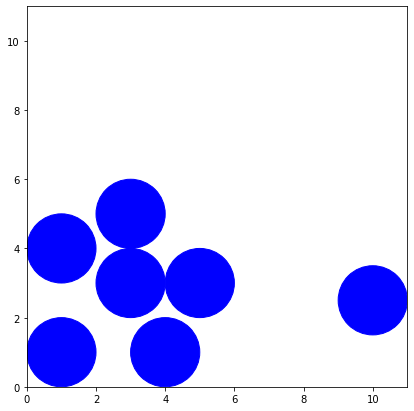

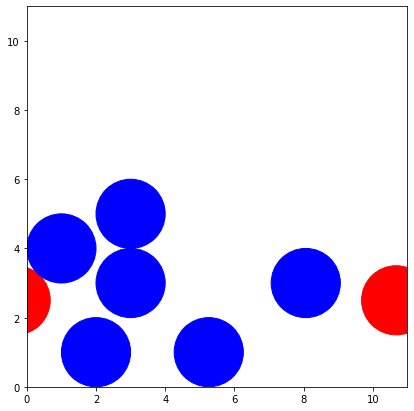

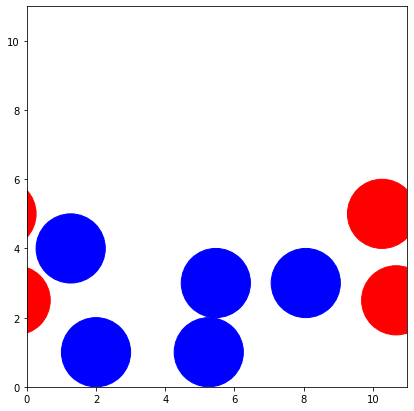

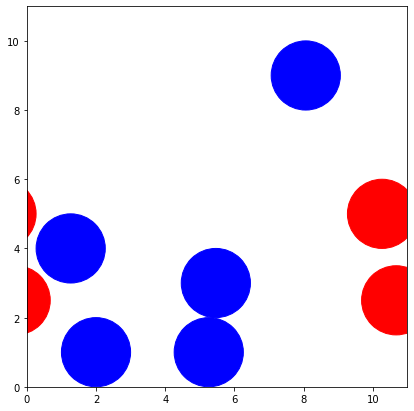

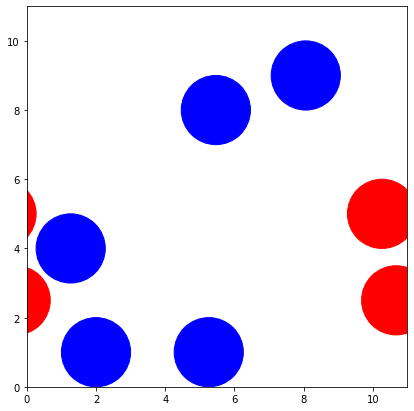

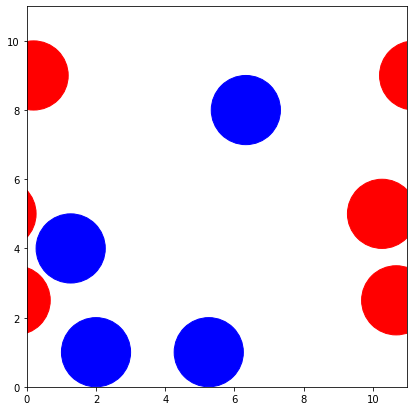

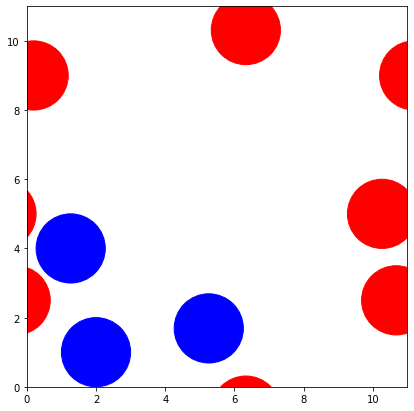

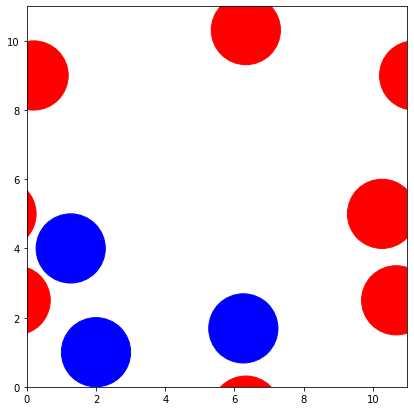

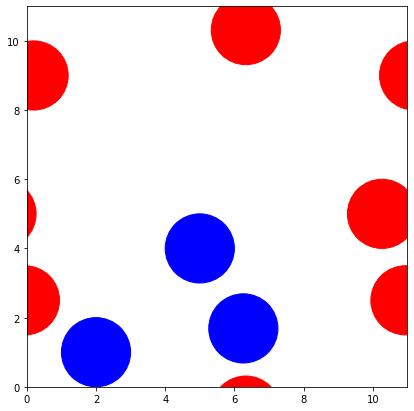

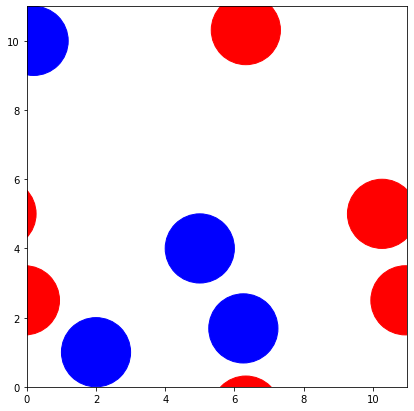

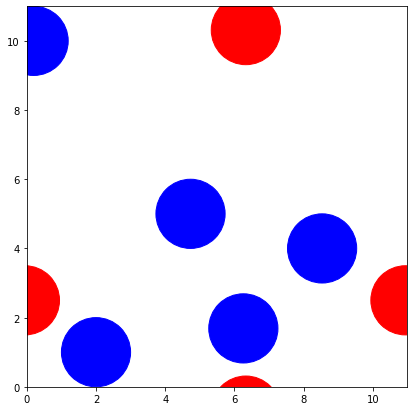

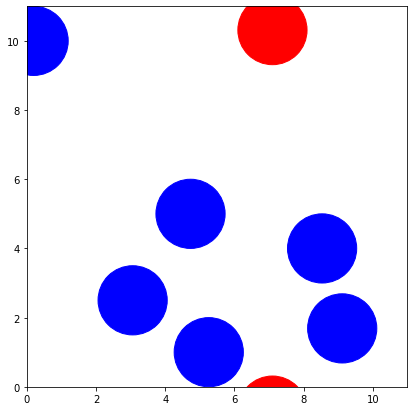

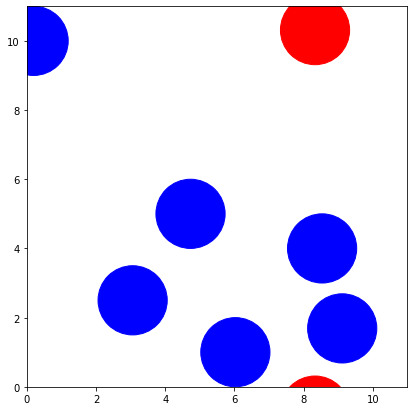

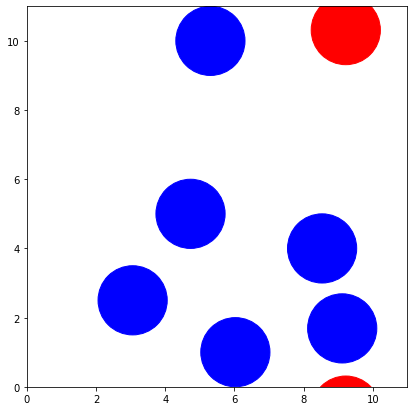

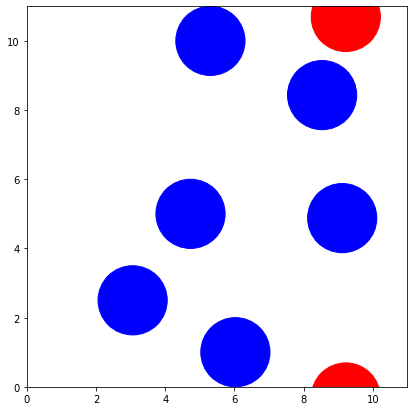

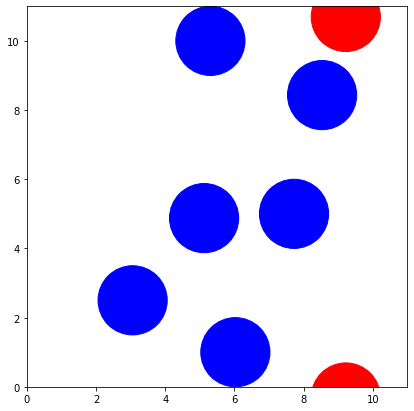

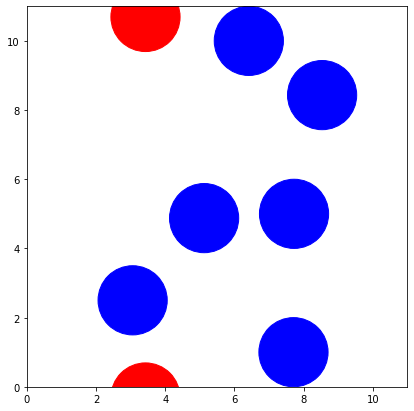

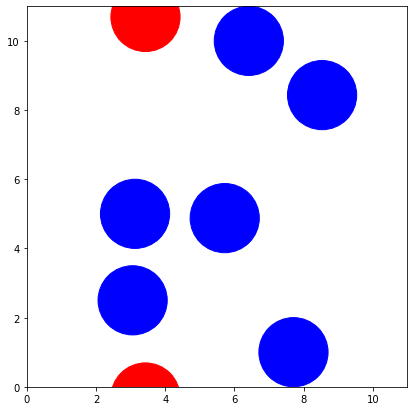

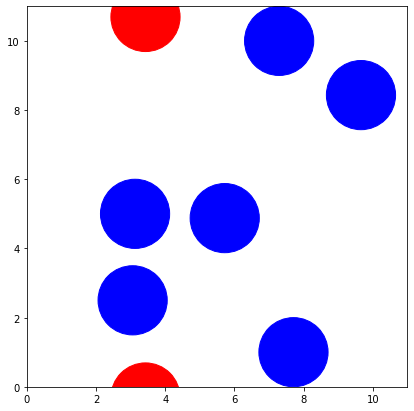

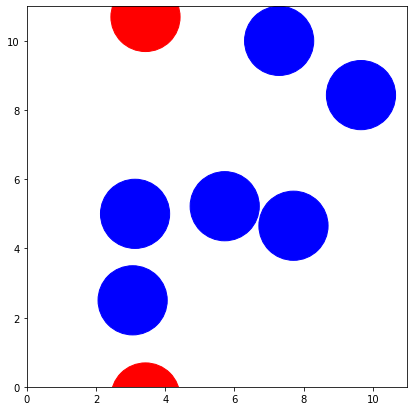

In [44]:
%%time
# Переходим в папку с результатами.
os.chdir("Results")

# Сохраняем начальное положение дисков.
intrmd_res.append(tmp)
SP(tmp, l_box, r, 0)

# После чего начинаем моделировать столкновения по случайным осям и расстояниям.
for i in range(1, 20):
    seed = np.random.randint(2)
    l_ost = np.random.randint(1, l_box)

    if seed == 0:
        # Перед началом нужно не забыть отсортировать массив!!
        tmp = tmp[np.argsort(tmp[:, 1])]
        shx = np.random.randint(len(tmp))

        MOB_x(shx, tmp, l_ost, l_box, r)
        intrmd_res.append(tmp)

    if seed == 1:
        tmp = tmp[np.argsort(tmp[:, 0])]
        shy = np.random.randint(len(tmp))

        MOB_y(shy, tmp, l_ost, l_box, r)
        intrmd_res.append(tmp)

    SP(tmp, l_box, r, i)

# Список для хранения кадров.
frames = []
LoF = natsorted(os.listdir())

for frame_number in range(len(LoF)):
    frame = Image.open(LoF[frame_number])
    frames.append(frame)

frames[0].save(
    'colission.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=1500,
    loop=0
)

# Не забываем вернуться в исходную папку.
os.chdir("..")

res = tmp

Перевод кода в псевдокод:

In [26]:
txt = open('bebra.txt', 'r', encoding="utf-8")
lines = txt.readlines()
lines_r = []
for i in range(len(lines)):
    lines_r.append(p2p.python_to_pseudocode(lines[i].replace("\n","")))

txt.close()

In [27]:
with open ("Results_pseudo.txt", "w", encoding="utf-8") as output:
    for line in lines_r:
        output.write(line + '\n')